In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
import joblib

In [ ]:
# Load the dataset uploaded by the user
file_path = '/content/synthetic_waste_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   fill_level        1000 non-null   int64
 1   duration_to_full  1000 non-null   int64
 2   crowded_location  1000 non-null   int64
 3   weekly_frequency  1000 non-null   int64
 4   need_transport    1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


(   fill_level  duration_to_full  crowded_location  weekly_frequency  \
 0          62                67                 0                 3   
 1          37                35                 1                 1   
 2          72                37                 0                 1   
 3          32                15                 0                 5   
 4          83                61                 0                 5   
 
    need_transport  
 0               0  
 1               0  
 2               0  
 3               0  
 4               1  ,
 None)

In [ ]:
# Define features (X) and target (y)
X = data[["fill_level", "duration_to_full", "crowded_location", "weekly_frequency"]]
y = data["need_transport"]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC Curve

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

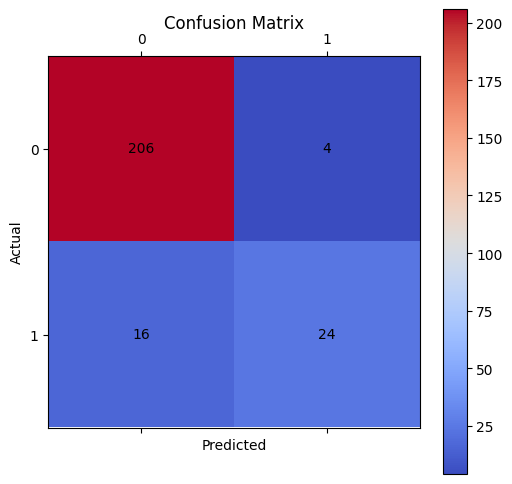

In [ ]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 6))
plt.matshow(conf_matrix, cmap='coolwarm', fignum=1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], va='center', ha='center')
plt.title("Confusion Matrix", pad=20)
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


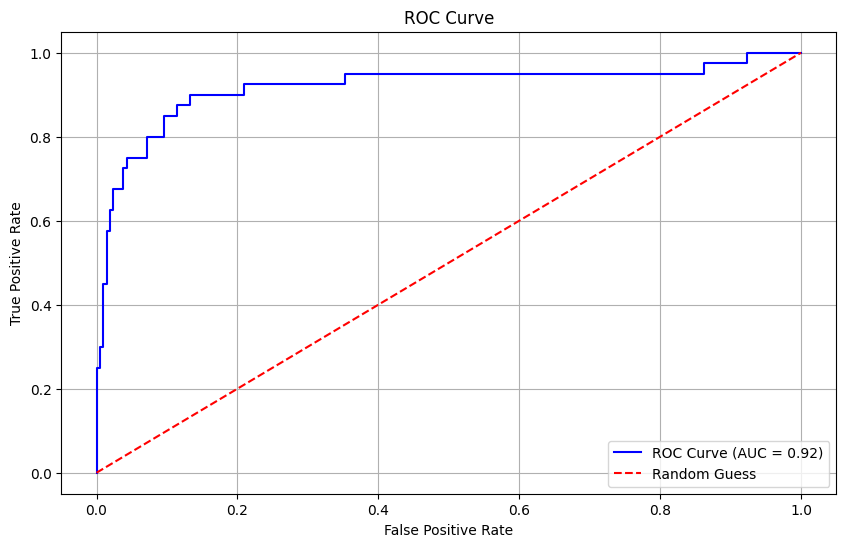

In [ ]:
# Visualization of ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Printing the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nROC AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[206   4]
 [ 16  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       210
           1       0.86      0.60      0.71        40

    accuracy                           0.92       250
   macro avg       0.89      0.79      0.83       250
weighted avg       0.92      0.92      0.91       250


ROC AUC Score: 0.92


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
optimal_idx = np.argmax(precision - recall)

# Check if optimal_idx is within bounds
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else thresholds[-1]

# Adjust prediksi menggunakan threshold baru
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(scores))


Cross-Validation Accuracy: 0.9253333333333333


In [ ]:
from sklearn.metrics import log_loss

# Fungsi Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Logistic Regression menggunakan Gradient Descent
def train_logistic_regression(X, y, lr=0.01, max_iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []  # Untuk menyimpan nilai loss selama iterasi

    for i in range(max_iter):
        # Prediksi
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Hitung loss (log-loss)
        loss = log_loss(y, y_pred)
        losses.append(loss)

        # Gradient Descent
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update weights dan bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, losses


In [ ]:
# Data untuk pelatihan
X_train_np = np.array(X_train_scaled)  # Konversi ke NumPy array
y_train_np = np.array(y_train)

In [ ]:
# Latih model Logistic Regression
weights, bias, losses = train_logistic_regression(X_train_np, y_train_np, lr=0.01, max_iter=10000)


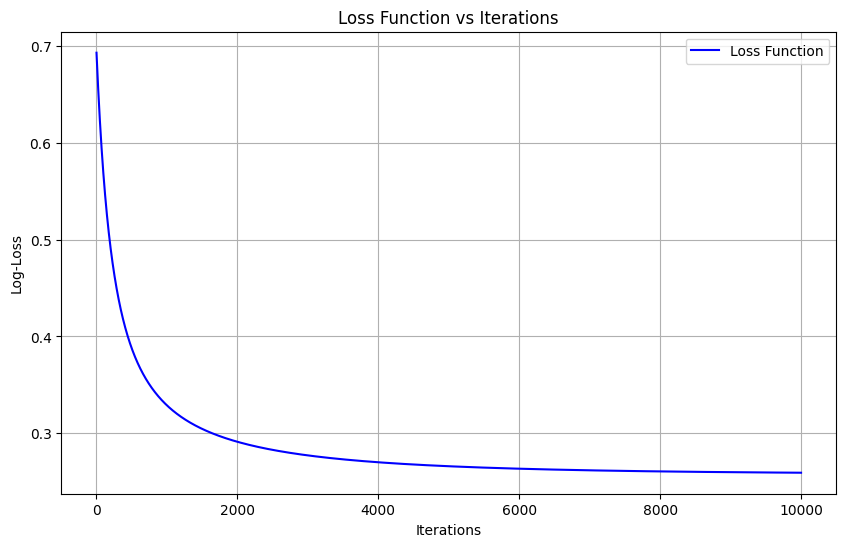

In [ ]:
# Plot Loss Function
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, label="Loss Function", color="blue")
plt.title("Loss Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log-Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import networkx as nx
from scipy.special import expit  # Sigmoid function from scipy

In [ ]:
# Logistic Regression coefficients (trained model)
intercept = model.intercept_[0]  # Intercept dari model yang telah dilatih
coef = model.coef_[0]            # Koefisien fitur dari model yang telah dilatih

In [ ]:
print("Intercept:", intercept)
print("Coefficients:", coef)

Intercept: -2.9706763692156546
Coefficients: [ 2.18293801 -0.0269514  -0.2427524   1.37921188]


In [ ]:
# Threshold untuk koleksi berdasarkan probabilitas dan level pengisian
collection_threshold = 0.75  # Probabilitas minimum
fill_threshold = 50         # Level pengisian minimum (dalam persen)

In [ ]:
# Data harian (nodes): [fill_level, duration_to_full, crowded_location, weekly_frequency, x, y]
daily_data = [
    [70, 5, 1, 3, 0, 0],  # Node A
    [60, 4, 0, 2, 2, 2],  # Node B
    [80, 6, 1, 4, 3, 1],  # Node C
    [3, 120, 0, 1, 1, 0],  # Node D
    [90, 7, 1, 5, 6, 1],  # Node E
    [40, 2, 0, 1, 8, 0]   # Node F
]

In [ ]:
# Fungsi untuk menghitung probabilitas koleksi
def predict_collection_probability(features):
    linear_combination = intercept + np.dot(coef, features)
    probability = expit(linear_combination)  # Sigmoid function
    return probability

In [ ]:
# Hitung probabilitas dan status koleksi untuk setiap node
collection_probabilities = []
collection_status = []
coordinates = []

for i, (fill_level, duration_to_full, crowded_location, weekly_frequency, x, y) in enumerate(daily_data):
    features = [fill_level, duration_to_full, crowded_location, weekly_frequency]
    prob = predict_collection_probability(features)
    collection_probabilities.append(prob)
    coordinates.append((x, y))
    status = "HIGH" if fill_level >= 75 else ("MIDDLE" if fill_level >= 50 else "LOW")
    collection_needed = 1 if prob >= collection_threshold and fill_level >= fill_threshold else 0
    collection_status.append((status, collection_needed))

    print(f"Node {chr(65 + i)} - Fill Level: {fill_level}%, "
          f"Collection Probability: {prob:.2f}, Status: {status}, "
          f"Collection: {'Yes' if collection_needed == 1 else 'No'}")

Node A - Fill Level: 70%, Collection Probability: 1.00, Status: MIDDLE, Collection: Yes
Node B - Fill Level: 60%, Collection Probability: 1.00, Status: MIDDLE, Collection: Yes
Node C - Fill Level: 80%, Collection Probability: 1.00, Status: HIGH, Collection: Yes
Node D - Fill Level: 3%, Collection Probability: 0.85, Status: LOW, Collection: No
Node E - Fill Level: 90%, Collection Probability: 1.00, Status: HIGH, Collection: Yes
Node F - Fill Level: 40%, Collection Probability: 1.00, Status: LOW, Collection: No


In [ ]:
# Distance matrix for nodes (calculated based on coordinates)
distances = np.array([
    [0, 2.8, 3.2, 4.0, 6.1, 8.0],
    [2.8, 0, 1.4, 2.0, 3.6, 5.3],
    [3.2, 1.4, 0, 1.5, 2.8, 4.1],
    [4.0, 2.0, 1.5, 0, 1.2, 2.5],
    [6.1, 3.6, 2.8, 1.2, 0, 1.8],
    [8.0, 5.3, 4.1, 2.5, 1.8, 0]
])

In [ ]:
# Create graph from distance matrix for Dijkstra's algorithm
G = nx.from_numpy_array(distances)

In [ ]:
# Identify nodes marked for collection based on status
collection_nodes = [i for i, (_, collection_needed) in enumerate(collection_status) if collection_needed == 1]


In [ ]:
# Define the start node (office/base) as node 0
start_node = 0

# If there are nodes to collect from, find the optimal collection path
if collection_nodes:
    shortest_path = []
    total_distance = 0
    current_node = start_node

    while collection_nodes:
        # Calculate distance to each remaining collection node
        distances_to_collect = [(nx.dijkstra_path_length(G, current_node, node), node) for node in collection_nodes]
        min_distance, next_node = min(distances_to_collect)
        shortest_path.append((current_node, next_node))
        total_distance += min_distance
        collection_nodes.remove(next_node)
        current_node = next_node

    # Return to start node after finishing collection
    return_to_start = nx.dijkstra_path_length(G, current_node, start_node)
    total_distance += return_to_start
    shortest_path.append((current_node, start_node))

    # Display the optimal path and total distance
    print("\nOptimal Path for Collection:")
    for step in shortest_path:
        print(f"Move from Node {step[0]} to Node {step[1]}")
    print(f"Total Distance: {total_distance:.2f} km")

else:
    print("\nNo bins require collection today.")


Optimal Path for Collection:
Move from Node 0 to Node 0
Move from Node 0 to Node 1
Move from Node 1 to Node 2
Move from Node 2 to Node 4
Move from Node 4 to Node 0
Total Distance: 12.10 km


In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']